# Gold Price Prediction with Machine Learning

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

In [4]:
df = yf.download('Gold',
                start='2001-01-01',
                end='2023-06-27',
                progress=False)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,16.379999,17.190001,16.320000,17.120001,12.392013,1817200
2001-01-03,17.200001,17.340000,16.200001,16.230000,11.747799,2095400
2001-01-04,16.150000,16.190001,15.700000,15.770000,11.414839,1620800
2001-01-05,15.880000,16.240000,15.240000,15.370000,11.125304,1679400
2001-01-08,15.520000,15.750000,15.360000,15.550000,11.255597,896200


In [6]:
df['Return'] = df['Adj Close'].pct_change() * 100
df['Lagged_Return'] = df.Return.shift()
df = df.dropna()
train = df['2001':'2021']
test = df['2022':'2023']

# Create train and test sets for dependent and independent variables
xtrain = train['Lagged_Return'].to_frame()
ytrain = train['Return']
xtest = test['Lagged_Return'].to_frame()
ytest = test['Return']

### Using Linear Regression Model

In [7]:
model = LinearRegression()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

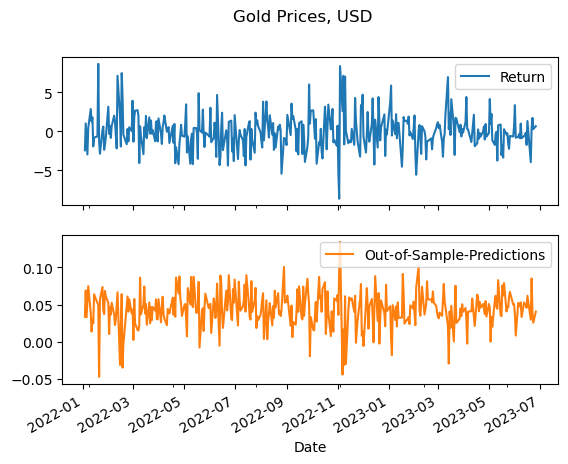

In [8]:
import matplotlib.pyplot as plt
out_of_sample_results = ytest.to_frame()
out_of_sample_results["Out-of-Sample-Predictions"] = model.predict(xtest)
out_of_sample_results.plot(subplots=True, title='Gold Prices, USD')
plt.show()